In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales_data_correlated.csv')
df.head()

,Order ID,Product,Price Each,Order Date,Purchase Address,Quantity Ordered
0,176633,Flatscreen TV,13.69,2023-01-01,"492 Main St, Phoenix, AZ",4
1,176592,Wired Headphones,13.28,2023-01-02,"910 Main St, Dallas, TX",4
2,176655,Macbook Pro Laptop,14.27,2023-01-03,"345 Main St, Portland, OR",4
3,176586,Flatscreen TV,15.77,2023-01-04,"275 Main St, Los Angeles, CA",3
4,176626,Google Phone,12.30,2023-01-05,"138 Main St, San Francisco, CA",4


In [3]:
X = df[['Price Each']]  # Variable independiente
y = df['Quantity Ordered'] # Variable dependiente

Coeficientes: [-0.01065119]
Intersección: 2.0130469151899097


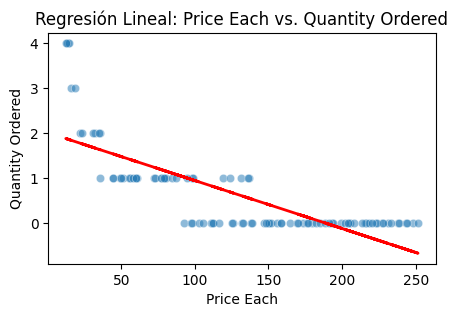

In [9]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f"Coeficientes: {model.coef_}")
print(f"Intersección: {model.intercept_}")

plt.figure(figsize=(5, 3))
sns.scatterplot(x='Price Each', y='Quantity Ordered', data=df, alpha=0.5)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.title('Regresión Lineal: Price Each vs. Quantity Ordered')
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.show()

In [5]:
r_squared = model.score(X, y)
print(f"R2 del modelo: {r_squared}")

R2 del modelo: 0.5846008424556153


In [6]:
df['Order Month'] = pd.to_datetime(df['Order Date'], errors='coerce').dt.month
df.head()

,Order ID,Product,Price Each,Order Date,Purchase Address,Quantity Ordered,Order Month
0,176633,Flatscreen TV,13.69,2023-01-01,"492 Main St, Phoenix, AZ",4,1
1,176592,Wired Headphones,13.28,2023-01-02,"910 Main St, Dallas, TX",4,1
2,176655,Macbook Pro Laptop,14.27,2023-01-03,"345 Main St, Portland, OR",4,1
3,176586,Flatscreen TV,15.77,2023-01-04,"275 Main St, Los Angeles, CA",3,1
4,176626,Google Phone,12.30,2023-01-05,"138 Main St, San Francisco, CA",4,1


In [7]:
X_multiple = df[['Price Each', 'Order Month']]
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y)

print(f"Coeficientes: {model_multiple.coef_}")
print(f"Intersección: {model_multiple.intercept_}")

Coeficientes: [-0.01734583  0.49836503]
Intersección: 1.7859373562829823


In [10]:
r_squared_multiple = model_multiple.score(X_multiple, y)
print(f"R2 del modelo múltiple: {r_squared_multiple}")

R2 del modelo múltiple: 0.6090281242096193


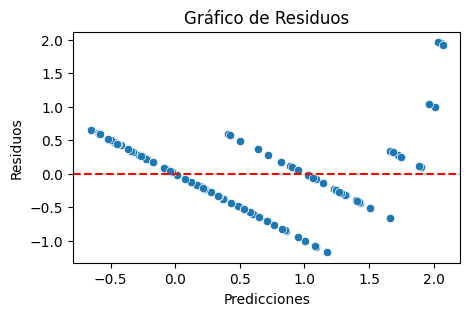

In [11]:
residuals = y - model_multiple.predict(X_multiple)
plt.figure(figsize=(5, 3))
sns.scatterplot(x=model_multiple.predict(X_multiple), y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()